In [2]:
# Import data source
import yfinance as yf

In [3]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'EW' #'SNDL' 'GAIL.NS'
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-28,37.520000,37.816666,37.490002,37.703335,37.703335,3150600
2017-08-29,37.439999,37.750000,37.246666,37.276669,37.276669,4098000
2017-08-30,37.340000,37.663334,37.176666,37.563332,37.563332,2787600
2017-08-31,37.606667,37.930000,37.480000,37.886665,37.886665,3274200
2017-09-01,37.930000,38.033333,37.596668,37.770000,37.770000,2850000


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-22,97.160004,98.220001,95.519997,95.870003,95.870003,2073200
2022-08-23,95.300003,95.300003,93.570000,94.150002,94.150002,2289500
2022-08-24,94.820000,95.589996,93.500000,94.959999,94.959999,2546500
2022-08-25,95.980003,96.669998,95.129997,96.650002,96.650002,1753200
2022-08-26,95.989998,96.339996,91.080002,91.239998,91.239998,2209900


In [6]:
opn = data[['Open']]

<AxesSubplot:xlabel='Date'>

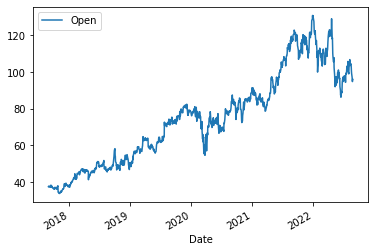

In [7]:
opn.plot()

In [8]:
import matplotlib.pyplot as plt

In [9]:
ds = opn.values

In [10]:
ds

array([[37.52000046],
       [37.43999863],
       [37.34000015],
       ...,
       [94.81999969],
       [95.98000336],
       [95.98999786]])

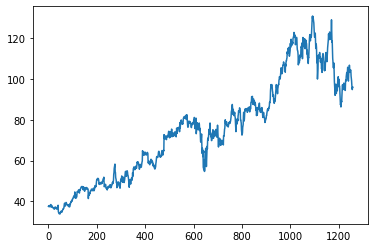

In [11]:
plt.plot(ds)

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [15]:
#ds_scaled = ds_scaled[:1232]
#ds = ds[:1232]
len(ds_scaled), len(ds)

(1259, 1259)

In [16]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [17]:
train_size,test_size

(881, 378)

In [18]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [19]:
if len(ds_scaled) == train_size + test_size:
    print("EQUAL")
else:
    print("NOT EQUAL")

EQUAL


In [20]:
len(ds_train),len(ds_test)

(881, 378)

In [21]:
len(ds_train)

881

In [22]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step-1, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [23]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [24]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [28]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 7s 222ms/step - loss: 0.0396 - val_loss: 0.0541
Epoch 2/100
13/13 [==============================] - 2s 126ms/step - loss: 0.0067 - val_loss: 0.0075
Epoch 3/100
13/13 [==============================] - 2s 125ms/step - loss: 0.0031 - val_loss: 0.0144
Epoch 4/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0015 - val_loss: 0.0083
Epoch 5/100
13/13 [==============================] - 2s 128ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 6/100
13/13 [==============================] - 2s 126ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 7/100
13/13 [==============================] - 2s 126ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 8/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 9/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 10/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0011 - val_lo

13/13 [==============================] - 2s 135ms/step - loss: 3.7882e-04 - val_loss: 6.8816e-04
Epoch 79/100
13/13 [==============================] - 2s 171ms/step - loss: 3.6178e-04 - val_loss: 3.7470e-04
Epoch 80/100
13/13 [==============================] - 2s 139ms/step - loss: 2.7368e-04 - val_loss: 8.1890e-04
Epoch 81/100
13/13 [==============================] - 2s 141ms/step - loss: 2.4682e-04 - val_loss: 0.0011
Epoch 82/100
13/13 [==============================] - 2s 140ms/step - loss: 2.4013e-04 - val_loss: 8.7744e-04
Epoch 83/100
13/13 [==============================] - 2s 136ms/step - loss: 2.2174e-04 - val_loss: 2.8711e-04
Epoch 84/100
13/13 [==============================] - 2s 152ms/step - loss: 2.1017e-04 - val_loss: 2.7761e-04
Epoch 85/100
13/13 [==============================] - 2s 133ms/step - loss: 2.2967e-04 - val_loss: 0.0011
Epoch 86/100
13/13 [==============================] - 2s 122ms/step - loss: 2.4588e-04 - val_loss: 2.7905e-04
Epoch 87/100
13/13 [===========

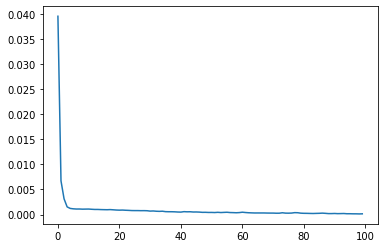

In [30]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [31]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 30ms/step


In [32]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)


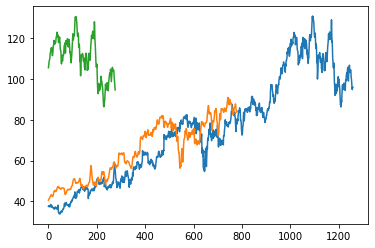

In [33]:
#Visual comperison
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [34]:
type(train_predict)

numpy.ndarray

In [96]:
test = np.vstack((train_predict,test_predict))

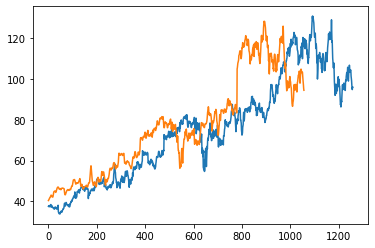

In [97]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [98]:
len(ds_test)

378

In [99]:
#Getting the last 100 days records
# fut_inp = ds_test[270:]
fut_inp = ds_test[:100]

In [100]:
len(fut_inp)

100

In [101]:
fut_inp = fut_inp.reshape(1,-1)

In [102]:
tmp_inp = list(fut_inp)

In [103]:
fut_inp.shape

(1, 100)

In [104]:
fut_inp.shape

(1, 100)

In [1]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()
tmp_inp

NameError: name 'tmp_inp' is not defined

In [106]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=fut_inp.shape[1]    # Needs to be checked !!!!
i=0
while(i<100):
    
    if(len(tmp_inp)>fut_inp.shape[1]):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7333428859710693], [0.7309525609016418], [0.7245305776596069], [0.7184551954269409], [0.7131495475769043], [0.7085426449775696], [0.7045592665672302], [0.701161801815033], [0.6983187794685364], [0.6959826350212097], [0.6940888166427612], [0.6925598978996277], [0.6913111209869385], [0.6902574896812439], [0.6893185973167419], [0.6884206533432007], [0.6875005960464478], [0.6865065693855286], [0.6853992938995361], [0.6841513514518738], [0.6827462911605835], [0.6811790466308594], [0.6794525384902954], [0.6775777339935303], [0.6755714416503906], [0.6734541654586792], [0.6712494492530823], [0.6689810156822205], [0.6666725277900696], [0.6643458008766174], [0.6620204448699951], [0.6597127914428711], [0.6574358344078064], [0.6551991701126099], [0.6530086398124695], [0.6508668661117554], [0.6487743854522705], [0.6467285752296448], [0.6447253823280334], [0.6427595019340515], [0.640824556350708], [0.6389138102531433], [0.6370207071304321], [0.6351389288902283], [0.6332627534866333], [0.63138699

In [107]:
len(ds_scaled)

1259

In [110]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)


ValueError: x and y must have same first dimension, but have shapes (30,) and (100, 1)

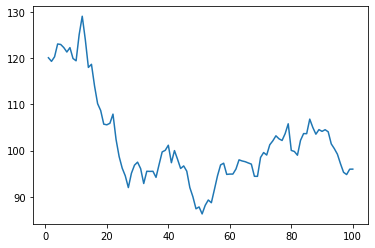

In [111]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[(len(ds_scaled)-100):]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [112]:
ds_new = ds_scaled.tolist()

In [113]:

len(ds_new)

1259

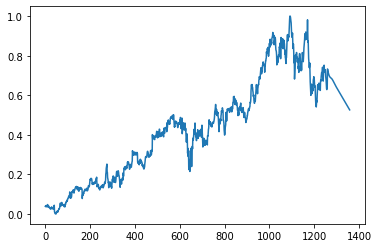

In [114]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[:])

In [115]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

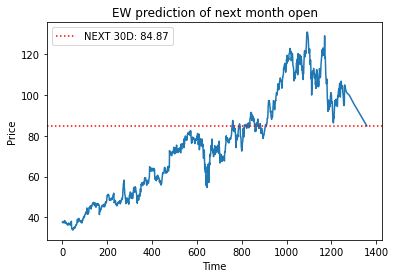

In [116]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()